In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)


17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [ ]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index['this']

11

In [ ]:
word_index['the']

1

In [ ]:
[i for i in range(5)]

[0, 1, 2, 3, 4]

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [ ]:
reverse_word_index.get(3)

'a'

In [ ]:
reverse_word_index.get(6627)

'crown'

In [ ]:

review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])


In [ ]:
mylist = ['I', 'Love', 'You'] 
print(' '.join(mylist))

I Love You


In [ ]:
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
train_label[0] #1：好評 / 0：壞評

1

In [ ]:
train_label[1]

0

In [ ]:
print(len(train_data[0]))
print(len(train_data[7]))


218
562


In [ ]:
from keras.preprocessing import sequence

In [ ]:
x_train_nomalize = sequence.pad_sequences(train_data, maxlen=1000)
x_test_nomalize = sequence.pad_sequences(test_data, maxlen=1000)

In [ ]:
print(x_train_nomalize.shape)
print(x_test_nomalize.shape)


(25000, 1000)
(25000, 1000)


In [ ]:
#建立DNN網路
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_history = model.fit(x_train_nomalize,
                          train_label,
                          batch_size=128,
                          validation_split=0.2,
                          epochs=20
                          )

Epoch 1/20
157/157 [==============================] - 16s 7ms/step - loss: 38.4984 - accuracy: 0.5071 - val_loss: 0.9791 - val_accuracy: 0.5090
Epoch 2/20
157/157 [==============================] - 1s 4ms/step - loss: 0.8882 - accuracy: 0.5031 - val_loss: 0.7294 - val_accuracy: 0.5066
Epoch 3/20
157/157 [==============================] - 1s 4ms/step - loss: 0.7089 - accuracy: 0.4967 - val_loss: 0.7238 - val_accuracy: 0.5128
Epoch 4/20
157/157 [==============================] - 1s 4ms/step - loss: 0.6975 - accuracy: 0.4938 - val_loss: 0.7095 - val_accuracy: 0.4932
Epoch 5/20
157/157 [==============================] - 1s 4ms/step - loss: 0.6949 - accuracy: 0.4958 - val_loss: 0.7092 - val_accuracy: 0.4922
Epoch 6/20
157/157 [==============================] - 1s 4ms/step - loss: 0.6934 - accuracy: 0.5049 - val_loss: 0.7058 - val_accuracy: 0.4934
Epoch 7/20
157/157 [==============================] - 1s 4ms/step - loss: 0.6953 - accuracy: 0.4988 - val_loss: 0.7355 - val_accuracy: 0.4900
Epoc

In [ ]:
import numpy as np

In [ ]:
def multi_hot_seq(seq,dimension=10000): 
  results = np.zeros((len(seq),dimension))
  for i,seq in enumerate(seq):
    results[i,seq] = 1
  return results

In [ ]:
x_train_normalize2 = multi_hot_seq(train_data)
x_test_normalize2 = multi_hot_seq(test_data)

In [ ]:
x_train_normalize2.shape

(25000, 10000)

In [ ]:
#建立DNN網路
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(16,
                       activation='relu',
                       input_shape=(10000,)))
model.add(layers.Dense(16,
                       activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_history = model.fit(x_train_normalize2,
                          train_label,
                          batch_size=128,
                          validation_split=0.2,
                          epochs=5)

Epoch 1/5
157/157 [==============================] - 3s 13ms/step - loss: 0.4613 - accuracy: 0.8012 - val_loss: 0.2829 - val_accuracy: 0.8906
Epoch 2/5
157/157 [==============================] - 2s 10ms/step - loss: 0.2040 - accuracy: 0.9244 - val_loss: 0.2877 - val_accuracy: 0.8902
Epoch 3/5
157/157 [==============================] - 2s 10ms/step - loss: 0.1530 - accuracy: 0.9456 - val_loss: 0.3327 - val_accuracy: 0.8780
Epoch 4/5
157/157 [==============================] - 2s 10ms/step - loss: 0.1224 - accuracy: 0.9576 - val_loss: 0.3443 - val_accuracy: 0.8800
Epoch 5/5
157/157 [==============================] - 2s 10ms/step - loss: 0.0970 - accuracy: 0.9665 - val_loss: 0.4128 - val_accuracy: 0.8760


In [ ]:
import matplotlib.pyplot as plt
def show_train_history(show_train_value,test_value):
    plt.plot(train_history.history[show_train_value])
    plt.plot(train_history.history[test_value])
    plt.title('Train History')
    plt.ylabel(show_train_value)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

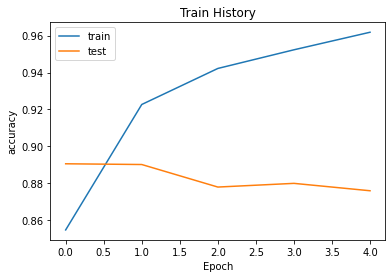

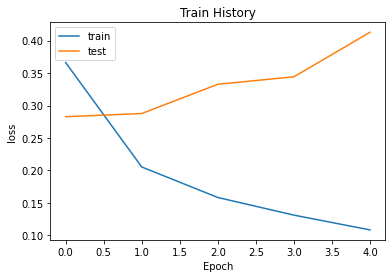

In [ ]:
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

In [ ]:
model.evaluate(x_test_normalize2,test_label)[1]

782/782 [==============================] - 1s 2ms/step - loss: 0.4293 - accuracy: 0.8638


0.8637999892234802

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [ ]:
model = Sequential()
model.add(Embedding(10000, output_dim=32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_history = model.fit(x_test_nomalize, train_label,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 62s 334ms/step - loss: 0.6972 - accuracy: 0.4987 - val_loss: 0.6941 - val_accuracy: 0.4970
Epoch 2/10
157/157 [==============================] - 52s 330ms/step - loss: 0.6663 - accuracy: 0.6217 - val_loss: 0.7082 - val_accuracy: 0.4998
Epoch 3/10
157/157 [==============================] - 52s 329ms/step - loss: 0.5531 - accuracy: 0.7455 - val_loss: 0.7914 - val_accuracy: 0.5044
Epoch 4/10
157/157 [==============================] - 52s 332ms/step - loss: 0.3834 - accuracy: 0.8527 - val_loss: 0.9116 - val_accuracy: 0.5014
Epoch 5/10
157/157 [==============================] - 52s 330ms/step - loss: 0.2269 - accuracy: 0.9314 - val_loss: 1.0920 - val_accuracy: 0.5066
Epoch 6/10
157/157 [==============================] - 52s 329ms/step - loss: 0.3158 - accuracy: 0.8766 - val_loss: 1.2251 - val_accuracy: 0.4994
Epoch 7/10
157/157 [==============================] - 52s 330ms/step - loss: 0.1140 - accuracy: 0.9681 - val_loss: 1.3474 - val_ac

In [ ]:
#自己抓資料轉成數字
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=50)
my_word = ['I love play basketball', 'would you marry me', 'I also like dog']
tokenizer.fit_on_texts(my_word)

In [ ]:
tokenizer.texts_to_sequences(my_word)

[[1, 2, 3, 4], [5, 6, 7, 8], [1, 9, 10, 11]]

In [ ]:
tokenizer.texts_to_matrix(my_word)

array([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])